In [18]:
from RealEstateAnalysis.Data import DataCsv
from decimal import Decimal
from pprint import pprint as pp
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [19]:
fileName = "RealEstateAnalysis/SampleData/EBR_Building_Permits.csv"
print(fileName)

RealEstateAnalysis/SampleData/EBR_Building_Permits.csv


In [20]:
def parseGeo(coords):
    parsed = coords.split("\n")[-1].replace("(", "").replace(")", "").split(",")
    if len(parsed) == 2:
        return [float(p) for p in parsed]
    else:
        return None

In [21]:
def parseMoney(money):
    return float(money.replace("$", ""))

In [22]:
data = DataCsv.new(fileName)
pp([b for a in data.load().sample(1).data for b in a.keys()])

['internal_id',
 'permit_number',
 'permit_type',
 'project_description',
 'lot_number',
 'square_footage',
 'project_value',
 'permit_fee',
 'creation_date',
 'issued_date',
 'address',
 'street_address',
 'city',
 'state',
 'zip',
 'subdivision',
 'parish_name',
 'owner_name',
 'applicant_name',
 'contractor_name',
 'contractor_address',
 'geolocation']


In [23]:
df = data.select(geolocation = lambda x : parseGeo(x['geolocation'])) \
         .load() \
         .dataFrame()
df
         

,geolocation
0,"[30.511097, -91.116758]"
1,None
2,"[30.380736, -91.014381]"
3,"[30.402395, -90.998373]"
4,"[30.505111, -91.116621]"
5,None
6,"[30.395607, -91.072878]"
7,"[30.411741, -91.056567]"
8,"[30.480904, -91.115949]"
9,"[30.367206, -91.124658]"


In [17]:
df = data.select(['zip','project_value','square_footage']) \
         .load() \
         .export(['zip','project_value', 'square_footage']) \
         .dataFrame() 
df = df[df[1] > 0]



AttributeError: 'list' object has no attribute 'split'

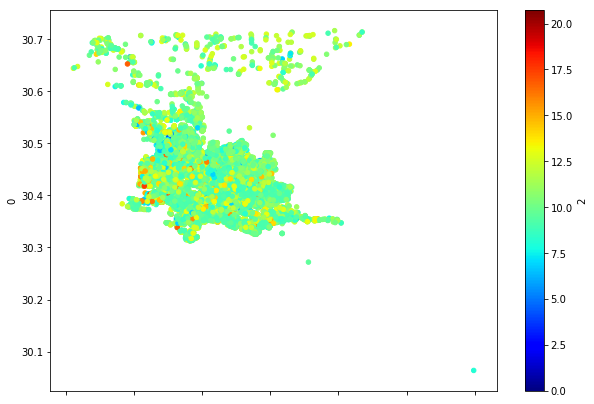

In [9]:
it = data.process(geolocation=parseGeo) \
         .process(project_value=lambda x: np.log(parseMoney(x))) \
         .where(state="LA") \
         .where(lambda x: parseGeo(x['geolocation']) is not None) \
         .where(lambda x: parseMoney(x ['project_value']) > 0) \
         .load() \
         .export(['geolocation', 'project_value']) 

def inCityLimits(a, b):
    return a < 31 and a > 30 and b > -91.5 and b < -90.5

df = pandas.DataFrame([[loc[0],loc[1], val] for loc, val in it if inCityLimits(*loc)])
df.plot(kind="scatter", x=1, y=0,c=2, cmap=plt.get_cmap("jet"), figsize=(10,7))





In [8]:
it = data.process(geolocation=parseGeo) \
         .process(project_value=lambda x : np.log(parseMoney(x))) \
         .where(state="LA") \
         .where(lambda x: parseGeo(x['geolocation']) is not None) \
         .where(lambda x: parseMoney(x ['project_value']) > 0) \
         .load() 
df2 = pandas.DataFrame([item for item in it])
df2.describe()

,project_value
count,18183.000000
mean,10.502251
std,1.693286
min,0.000000
25%,9.210340
50%,10.372209
75%,11.580584
max,20.723266


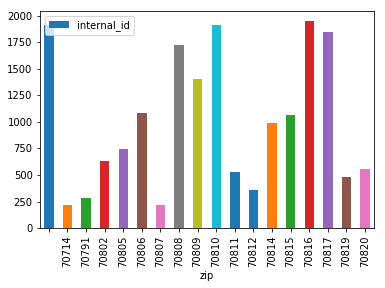

In [9]:
newDf = df2.groupby('zip') \
           .agg('count') \
           .reset_index() \
           .iloc[:, 0:2] \
    
newDf[newDf["internal_id"] > 100].plot.bar(x="zip", y="internal_id")